# Shopify Challenge : Sneaker shops problem

**Performed by Andrew Labeodan**

## Business Context
Shopify is a leading global commerce company, providing trusted tools to start, grow, market, and manage a retail business of any size. Shopify makes commerce better for everyone with a platform and services that are engineered for reliability, while delivering a better shopping experience for consumers everywhere. Shopify powers millions of businesses in more than 175 countries and is trusted by brands such as Allbirds, Gymshark, PepsiCo, Staples, and many more.

## Objective

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 
Address the situation by by answering the following questions:

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2. What metric would you report for this dataset?
3. What is its value?


## Data Dictionary

The data contains information regarding the orders by users at different shops.

1. order_id - unique order number.
2. shop_id - shop from which the order was placed.
3. user_id - unique customer ID.
4. order_amount - payment amount for the order.
5. total_items - amount of items placed on the order.
6. payment_method - how the order was paid for.
7. created_at - time at which the order was placed.

### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

### Loading the dataset

In [2]:
data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
# copying data to another variable to avoid any changes to original data
df = data.copy()

## Exploring the dataset and extract insights using Exploratory Data Analysis

### Data Overview

- Data Overview
- Viewing the first and last few rows of the dataset
- Checking the shape of the dataset
- Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

#### Displaying the first few rows of the dataset

In [3]:
# view the first 5 rows of the dataset
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


#### Displaying the last few rows of the dataset

In [4]:
# view the last 5 rows of the dataset
df.tail()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18
4999,5000,44,734,288,2,debit,2017-03-18 15:48:18


- The dataset contains all 7 columns as detailed in the data dictionary, each row contains data specific to a order id.
- Created at column represents a date and time, we may want to convert this for further analysis.

#### Checking the shape of the dataset

In [5]:
# view the shape of the dataset
df.shape

(5000, 7)

- There are 5000 rows and 7 columns of data.

#### Checking the data types of the columns for the dataset

In [6]:
# check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


- There are 2 categorical columns and 5 numerical columns.
- There is undefined data 5000 non-null values for each column.

In [7]:
#Verifying the number of shops in the dataset.
df['shop_id'].nunique()

100

- There are 100 shops in the dataset.

In [8]:
# Checking the number of users in the dataset.
df['user_id'].nunique()

301

- There are 301 users in the dataset.

#### Getting the statistical summary for the numerical variables

In [9]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


- The mean for order amount is $3145.13 which is the AOV described in the problem statement.
- The std for order amount is very large which suggest that the data is widely spread out from the mean.
- The order amount ranges from both landing pages the time spent ranges from 90 to 704000 dollars.
- The total items ordered also has a huge range of 1 to 2000, which supports the rationale for huge variation in the order amount.

#### Getting the statistical summary for the categorical variables

In [10]:
df.describe(include='all')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000,5000
unique,NaN,NaN,NaN,NaN,NaN,3,4991
top,NaN,NaN,NaN,NaN,NaN,credit_card,2017-03-28 4:00:00
freq,NaN,NaN,NaN,NaN,NaN,1735,3
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,NaN,NaN
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,NaN,NaN
min,1.000000,1.000000,607.000000,90.000000,1.00000,NaN,NaN
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,NaN,NaN
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,NaN,NaN
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,NaN,NaN


- There are 3 different type of payment methods used and credit card is the most frequent payment method.

### Check for missing values

In [11]:
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

- There appears to be no missing records in the dataset.

### Check for duplicates

In [12]:
df[df.duplicated()]


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at


- There are no duplicate records in the dataset.

### Check the data is for 30 days time period

In [13]:
# converting the created at to datetime type.
df['created_at']= pd.to_datetime(df['created_at'])

# Checking to date duration of the dataset
df['created_at'].min(), df['created_at'].max()

(Timestamp('2017-03-01 00:08:09'), Timestamp('2017-03-30 23:55:35'))

- The order window is from the 1st - 30th of March 2017.

In [14]:
df[df['order_amount']== 704000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00


- Looking at the data which has a huge amout of sales, we can see that shop 42 recieves consistent orders of 2000 items from the same user on different days.

### Univariate Analysis for order amount

#### Order amount visualisation

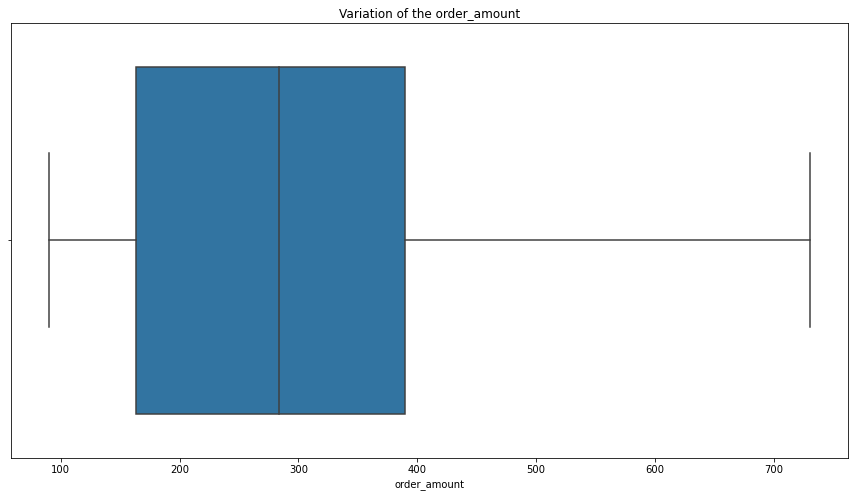

In [15]:
plt.figure(figsize =(15,8))
sns.boxplot(x='order_amount',showfliers=False ,data=df); #without outliers to visualise the general distribution of the data.
plt.title('Variation of the order_amount');

- This shows that the data is rightly skewed as there is a long whisker to the right.
- 75% of the order values are below approximately 390 dollars.
- 25% of the order values are below approximately 160 dollars.

### Evaluating the median for AOV

In [16]:
round(df['order_amount'].median(),2)

284.0

The value of the median is 284 dollars. This would be a better indication of the average order value.

## Conclusion and Business Recommendations


The dataset consisted of 5000 orders made by 301 users, the information is taken from 100 shops selling sneakers over a 30 day period in March 2017. The main focus is do some analysis of the average order value (AOV) and evaluate why the AOV of $3145.13 has been calculated knowing that these shops are selling sneakers, a relatively affordable item. 


Upon this analysis we have been able to conclude that:
* The mean for order amount is 3145.13 dollars as described in the problem statement. This is not due to incorrect data entry or duplicate data, but because there a large standard deviation associated with the data.
* The order amount ranges from 90 to 704000 dollars. The large maximum is explained by shop 42 which recieves regular orders of 2000 items which amounts to 704000 dollars.
* On observation of the data visualisation, the order amount data is significantly skewed to the right, therefore the mean is going to be larger than the median. We conclude that 75% of the order values are below approximately 390 dollers and 25% of the order values are below approximately 160 dollars.
* What metric would you report for this dataset? Due to the large variation of the data from the mean I would use the median of the order amounts to evaluate the AOV.
* What is its value? the value of the median is 284 dollars.

### Further Analysis that can be done:

* We can explore how the order amount varies with time in March for each shop Id.
* We can explore the Top 5 user IDs which spent the most in the month of March.
* We can explore the Top 5 shops with the highest order amount in March.

___